In [18]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 10,
          'axes.titlesize':14, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

In [110]:
class Adalaine:
    def __init__(self, learning_rate = 0.1, epochs = 100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.bias_weights = None
        
    def fit(self, X, y):
        try:
            samples, features = X.shape
        except:
            features = 1
            samples = X.size

            
        self.weights = 0.10 * np.random.randn(features)
        self.bias_weights = 0.10 * np.random.randn(1)
        self.bias = 1.
        
        for _ in range(self.epochs):
            for i, x in enumerate(X):
                y_predict = np.dot(x, self.weights) +  self.bias_weights * self.bias
                erro = (y[i] - y_predict)
                update = self.learning_rate * erro
                self.weights +=  update * x
                self.bias_weights += update * self.bias
    
    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias_weights * self.bias
        y_predict = output
        return y_predict

In [111]:
dataset1 = pd.read_csv('./datasets/dataset_regression.csv', sep=";", header = None, names=['y', 'x'])

#xTrain, xTest, yTrain, yTest = tts(dataset1[['y', 'x']].values, dataset1.target.values, shuffle = True, test_size = 0.25)


In [124]:
y = dataset1['y'].values
x = dataset1['x'].values

#learning_rate = 2e-5
#learning_rate = 2e-6
#learning_rate = 2e-7
ada = Adalaine(learning_rate = 2e-5, epochs = 40000)
ada.fit(x, y)

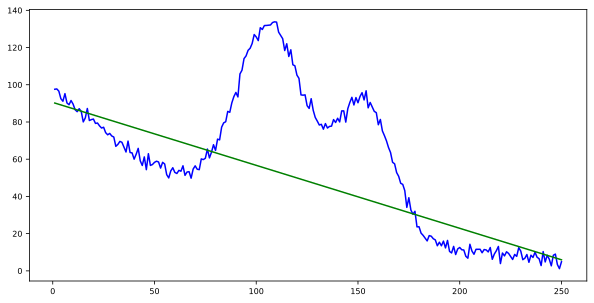

In [125]:
y_func = ada.weights[0]*x + ada.bias_weights[0]

plt.plot(x,y, color = 'blue')
plt.plot(x,y_func, color = 'green')
plt.show()

In [126]:
print(ada.weights[0]) 
print(ada.bias_weights[0])

-0.33835612449987956
90.51511165721342
